In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
PATH = '/content/drive/MyDrive/Parallel_PDE_project/fourier_neural_operator'
os.chdir(PATH)

In [ ]:
import sys  
sys.path.insert(0, 'Notebooks')
from utils import UnitGaussianNormalizer
from FNO import FNO

In [2]:
#Parameters

ntest = 1024
#wavenumber = [20, 20]
wavenumber = [20]
feature = 32
epochs = 100
activ = 'relu'
layers = 4
EqFile = 'Burgers'
filename = f'FNO_problem_{EqFile}_epoch_{epochs}_wavenumber_{wavenumber}_features_{feature}_act_{activ}'
filename

'FNO_problem_Burgers_epoch_100_wavenumber_[20]_features_32_act_relu'

In [3]:
################################################################
# Lifting map
################################################################
import torch.nn as nn
class R(nn.Module):
  def __init__(self, input, width):
    super().__init__()
    self.fc1 = nn.Linear(input, width)
  def forward(self,x):
    x = self.fc1(x)
    return x

In [4]:
'FNO_problem_DarcyFlow_epoch_100_wavenumber_[20, 20]_features_32_act_relu.plt'

'FNO_problem_DarcyFlow_epoch_100_wavenumber_[20, 20]_features_32_act_relu.plt'

In [5]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model= FNO(features_= feature, wavenumber= wavenumber, layers = layers, activation= activ).to(device)


NameError: ignored

In [ ]:
model = torch.load(os.path.join('trained_models',filename+'.plt'), map_location=torch.device('cpu'))

In [ ]:
################################################################
# load data and data normalization
################################################################
EqFile = 'Burgers'
PDE_dir =  os.path.join(PATH, 'data', EqFile)
x_train = torch.load( os.path.join(PDE_dir, f'{EqFile}_x_train.pt'))
y_train = torch.load(os.path.join(PDE_dir, f'{EqFile}_y_train.pt'))
x_test = torch.load(os.path.join(PDE_dir, f'{EqFile}_x_test.pt'))
y_test= torch.load(os.path.join(PDE_dir, f'{EqFile}_y_test.pt'))

In [6]:
s = x_test.shape[-2]

x_normalizer = UnitGaussianNormalizer(x_train)
x_train = x_normalizer.encode(x_train)
x_test = x_normalizer.encode(x_test)
x_test = x_test.reshape(ntest,s,s,1)
y_normalizer = UnitGaussianNormalizer(y_train)
y_train = y_normalizer.encode(y_train)

#x_train = x_train.reshape(ntrain,s,s,1)
x_train = x_train.reshape(ntrain,s,1)
#x_test = x_test.reshape(ntest,s,s,1)
x_test = x_test.reshape(ntest,s,1)

NameError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n_values = np.random.randint(low = 0, high = 100, size = 10)
n_values

array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1])

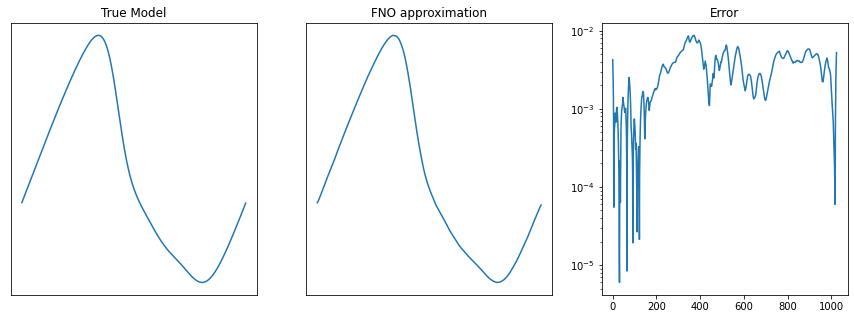

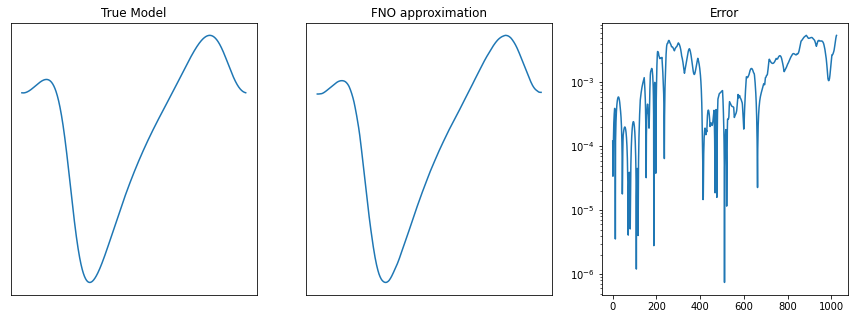

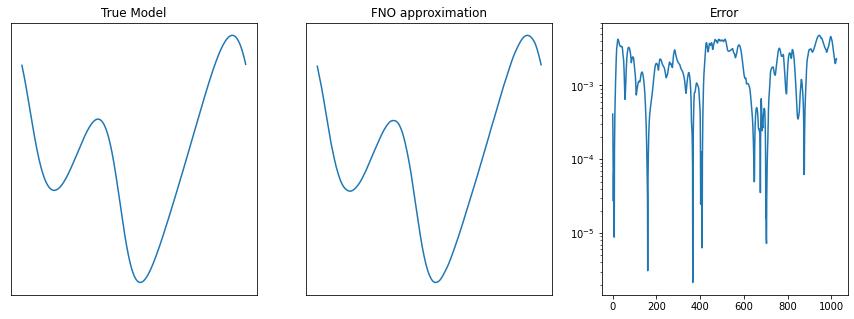

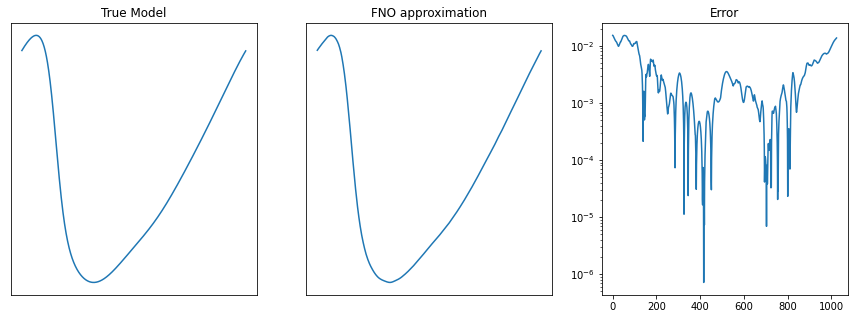

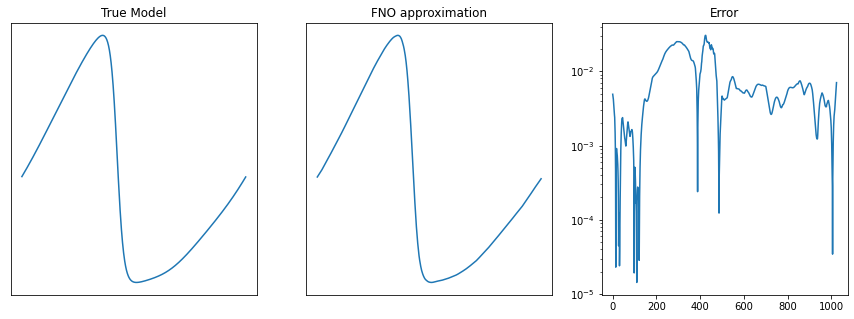

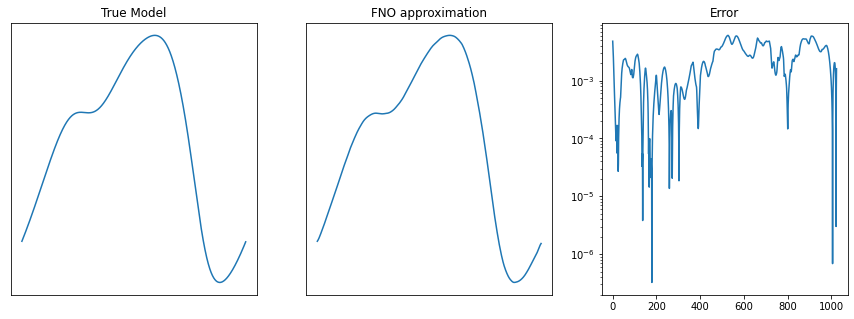

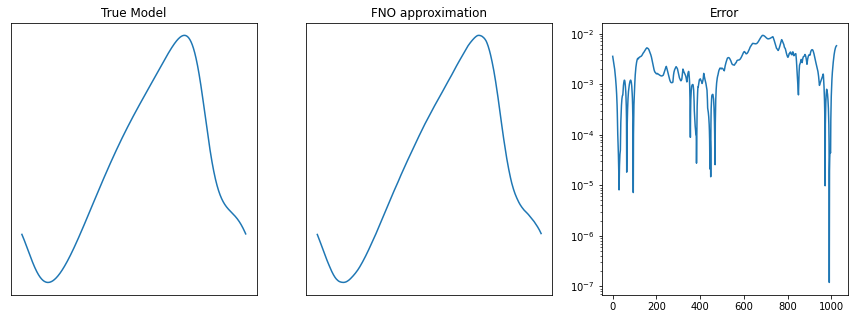

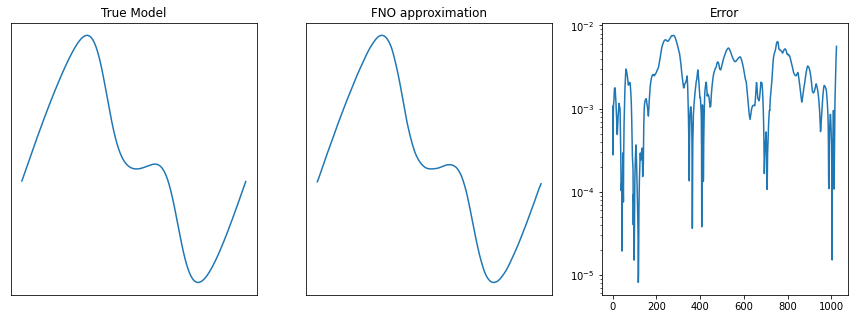

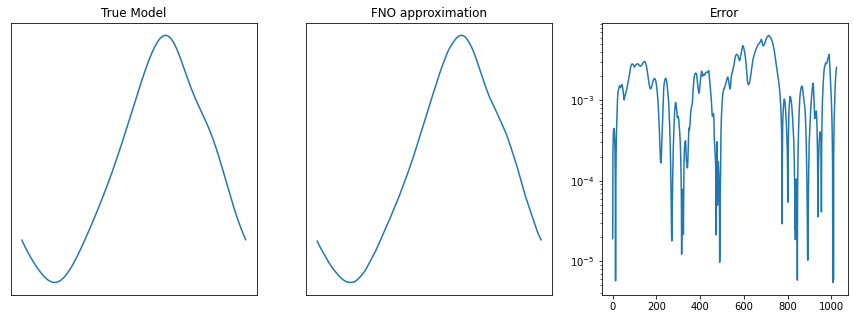

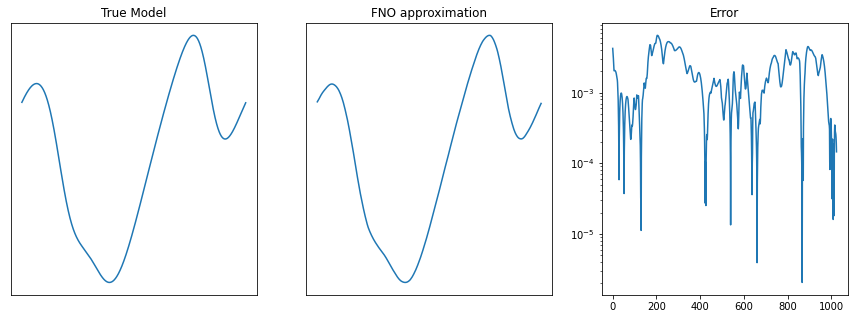

In [ ]:
for n in n_values: 
    y = model(x_test)[n,...].view(1,s,1)
    y_decode_rec = y_normalizer.decode(y.view(1,s))
    X_decode_test= x_normalizer.decode(x_test)[n,...].view(1,s)
    y_true_decode = y_test[n,...].view(1,s)

    plt.figure(figsize=(15,5))
    cmap = 'jet'


    plt.subplot(1,3,1)
    plt.plot(y_true_decode.reshape(s).detach().numpy())
    plt.title('True Model')
    plt.xticks([])
    plt.yticks([])
    #plt.colorbar(orientation="horizontal")


    plt.subplot(1,3,2)
    plt.plot(y_decode_rec.view(s).detach().numpy())
    plt.title('FNO approximation')
    plt.xticks([])
    plt.yticks([])
    #plt.colorbar(orientation="horizontal")


    plt.subplot(1,3,3)
    plt.plot((y_decode_rec-y_true_decode).view(s).abs().detach().numpy())
    plt.yscale('log')
    plt.title('Error')
    #plt.xticks([])
    #plt.yticks([])
    #plt.colorbar(orientation="horizontal")
    plt.savefig(os.path.join(PATH, 'figures', 'test', f'ex_{n}_'+filename+'.png'))
    plt.show();

RuntimeError: ignored

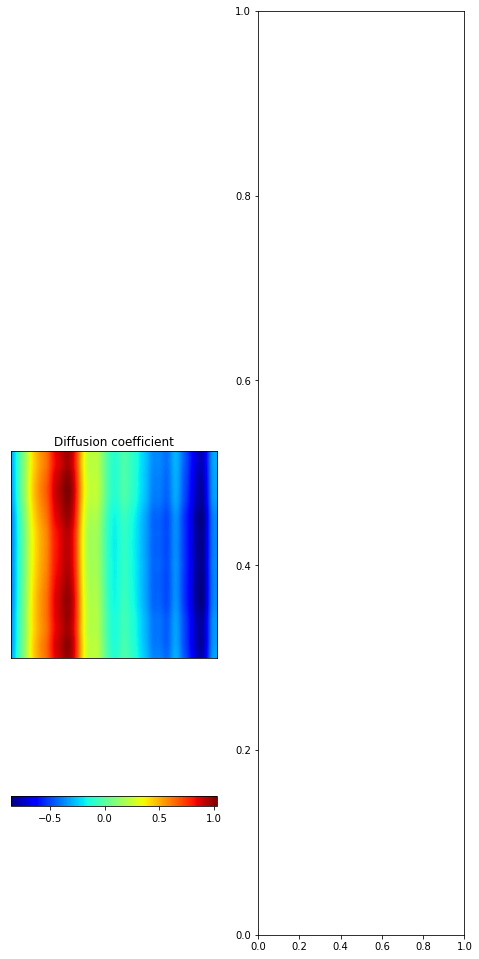

In [ ]:
##############
#For Darcy
'''for n in n_values: 
    y = model(x_test[n,...].view(1,s,s,1))
    y_decode_rec = y_normalizer.decode(y.view(1,s,s))
    X_decode_test= x_normalizer.decode(x_test[n,...].view(1,s,s))
    y_true_decode = y_test[n,...].view(1,s,s)


    plt.figure(figsize=(17,17))
    cmap = 'jet'

    plt.subplot(1,4,1)
    plt.imshow(X_decode_test.view(s,s).detach().numpy(), cmap =cmap)
    plt.title('Diffusion coefficient')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(orientation="horizontal")


    plt.subplot(1,4,2)
    plt.imshow(y_true_decode.reshape(s,s).detach().numpy(), cmap = cmap)
    plt.title('True Model')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(orientation="horizontal")


    plt.subplot(1,4,3)
    plt.imshow(y_decode_rec.view(s,s).detach().numpy(), cmap = cmap)
    plt.title('FNO approximation')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(orientation="horizontal")


    plt.subplot(1,4,4)
    plt.imshow((y_decode_rec-y_true_decode).view(s,s).abs().detach().numpy(), cmap = cmap)
    plt.title('Error')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(orientation="horizontal")
    plt.savefig(os.path.join(PATH, 'figures', 'test', f'ex_{n}_'+filename+'.png'))
    plt.show();
'''